<a href="https://colab.research.google.com/github/DT6A/Hands-On_Machine_Learning/blob/main/ML08_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple graph


In [ ]:
import tensorflow as tf

x = tf.Variable(3, name='x')
y = tf.Variable(4, name='y')
f = x * x * y + y + 2

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

42


In [ ]:
with tf.Session() as sess:
  x.initializer.run()
  y.initializer.run()
  result = f.eval()

In [ ]:
result

42

In [ ]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  init.run()
  result = f.eval()
  print(result)

42


In [ ]:
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)
sess.close()

42


##Graphs

In [ ]:
tf.reset_default_graph()
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [ ]:
graph = tf.Graph()
with graph.as_default():
  x2 = tf.Variable(2)
print(x2.graph is graph)
print(x2.graph is tf.get_default_graph())

True
False


##Lifecycle

In [ ]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
  print(y.eval())
  print(z.eval())

10
15


In [ ]:
with tf.Session() as sess:
  y_val, z_val = sess.run([y, z])
  print(y_val)
  print(z_val)

10
15


##Linear regression

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name='X')
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name='y')
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
  theta_value = theta.eval()

In [ ]:
theta_value

array([[-3.7185181e+01],
       [ 4.3633747e-01],
       [ 9.3952334e-03],
       [-1.0711310e-01],
       [ 6.4479220e-01],
       [-4.0338000e-06],
       [-3.7813708e-03],
       [-4.2348403e-01],
       [-4.3721911e-01]], dtype=float32)

##Gradient descent

In [ ]:
from sklearn.preprocessing import StandardScaler

housing_data_plus_bias = np.c_[np.ones((m, 1)), StandardScaler().fit_transform(housing.data)]

###Manual

In [ ]:
n_epochs = 1000
learning_rate = 0.01

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name='X')
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name='y')
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name='theta')
y_pred = tf.matmul(X, theta, name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')
gradients = 2 / m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

In [ ]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(n_epochs):
    if epoch % 100 == 0:
      print('Epoch', epoch, 'MSE =', mse.eval())
    sess.run(training_op)
    
  best_theta = theta.eval()

Epoch 0 MSE = 5.617959
Epoch 100 MSE = 0.70693284
Epoch 200 MSE = 0.6088639
Epoch 300 MSE = 0.58643645
Epoch 400 MSE = 0.57080543
Epoch 500 MSE = 0.55926675
Epoch 600 MSE = 0.55070794
Epoch 700 MSE = 0.54433733
Epoch 800 MSE = 0.5395786
Epoch 900 MSE = 0.53600967


In [ ]:
best_theta

array([[ 2.0685523 ],
       [ 0.86538976],
       [ 0.16531596],
       [-0.25855896],
       [ 0.26714796],
       [ 0.01197103],
       [-0.04402769],
       [-0.5268432 ],
       [-0.49805516]], dtype=float32)

###Autodiff

In [ ]:
gradients = tf.gradients(mse, [theta])[0]

In [ ]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(n_epochs):
    if epoch % 100 == 0:
      print('Epoch', epoch, 'MSE =', mse.eval())
    sess.run(training_op)
    
  best_theta = theta.eval()

Epoch 0 MSE = 6.438938
Epoch 100 MSE = 0.67763126
Epoch 200 MSE = 0.58009535
Epoch 300 MSE = 0.56633157
Epoch 400 MSE = 0.55726355
Epoch 500 MSE = 0.550327
Epoch 600 MSE = 0.5449523
Epoch 700 MSE = 0.540763
Epoch 800 MSE = 0.5374812
Epoch 900 MSE = 0.53489715


###Optimizers

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

In [ ]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(n_epochs):
    if epoch % 100 == 0:
      print('Epoch', epoch, 'MSE =', mse.eval())
    sess.run(training_op)
    
  best_theta = theta.eval()

Epoch 0 MSE = 11.241144
Epoch 100 MSE = 0.78911823
Epoch 200 MSE = 0.6037446
Epoch 300 MSE = 0.5824238
Epoch 400 MSE = 0.5686009
Epoch 500 MSE = 0.5582687
Epoch 600 MSE = 0.5504819
Epoch 700 MSE = 0.5445858
Epoch 800 MSE = 0.5401005
Epoch 900 MSE = 0.5366713


In [ ]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(n_epochs):
    if epoch % 100 == 0:
      print('Epoch', epoch, 'MSE =', mse.eval())
    sess.run(training_op)
    
  best_theta = theta.eval()

Epoch 0 MSE = 3.0966856
Epoch 100 MSE = 0.53141576
Epoch 200 MSE = 0.5250688
Epoch 300 MSE = 0.5244173
Epoch 400 MSE = 0.5243339
Epoch 500 MSE = 0.52432287
Epoch 600 MSE = 0.5243213
Epoch 700 MSE = 0.524321
Epoch 800 MSE = 0.524321
Epoch 900 MSE = 0.52432084


##SGD

In [ ]:
A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5

with tf.Session() as sess:
  B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
  B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})
  
print(B_val_1)
print(B_val_2)

[[6. 7. 8.]]
[[ 9. 10. 11.]
 [12. 13. 14.]]


In [ ]:
X = tf.placeholder(tf.float32, shape=(None, n + 1), name='X')
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

In [ ]:
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [ ]:
def fetch_batch(epoch, batch_index, batch_size):
  if epoch != fetch_batch.lep:
    fetch_batch.lep = epoch
    fetch_batch.ids = np.random.permutation(np.arange(m))
  #print(epoch, batch_index, batch_size)
  #print(fetch_batch.lep, fetch_batch.ids)
  X_batch = housing_data_plus_bias[fetch_batch.ids[batch_index*batch_size:batch_index*batch_size + batch_size]]
  y_batch = housing.target.reshape(-1, 1)[fetch_batch.ids[batch_index*batch_size:batch_index*batch_size + batch_size]]
  return X_batch, y_batch

fetch_batch.lep = -1
fetch_batch.ids = [1]
'''
with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(n_epochs):
    if epoch % 50 == 0:
      print('Epoch', epoch)
    for batch_index in range(n_batches):
      X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
  
  best_theta = theta.eval()
  '''

"\nwith tf.Session() as sess:\n  sess.run(init)\n  \n  for epoch in range(n_epochs):\n    if epoch % 50 == 0:\n      print('Epoch', epoch)\n    for batch_index in range(n_batches):\n      X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)\n      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})\n  \n  best_theta = theta.eval()\n  "

In [ ]:
best_theta

array([[ 2.0685577 ],
       [ 0.8296335 ],
       [ 0.11875428],
       [-0.2655537 ],
       [ 0.30571845],
       [-0.00450224],
       [-0.03932679],
       [-0.89985335],
       [-0.8705102 ]], dtype=float32)

##Saves

In [ ]:
saver = tf.train.Saver()

In [ ]:
import os

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(100):
    if epoch % 100 == 0:
      save_path = saver.save(sess, os.path.join(os.getcwd(), 'trained_variables.ckpt'))
    if epoch % 50 == 0:
      print('Epoch', epoch)
    for batch_index in range(n_batches):
      X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
  
  best_theta = theta.eval()
  save_path = saver.save(sess, os.path.join(os.getcwd(), 'model.ckpt'))

Epoch 0
Epoch 50


In [ ]:
save_path

'model.ckpt'

In [ ]:
with tf.Session() as sess:
  saver.restore(sess, save_path)
  print(theta.eval())

INFO:tensorflow:Restoring parameters from C:\Users\компьютер\DT6A\HandsOn\model.ckpt
[[ 2.068558  ]
 [ 0.82962054]
 [ 0.11875188]
 [-0.26552904]
 [ 0.305698  ]
 [-0.00450293]
 [-0.03932633]
 [-0.89988273]
 [-0.87053823]]


In [ ]:
saver = tf.train.Saver({'weights': theta})

In [ ]:
saver = tf.train.import_meta_graph(save_path+'.meta')

with tf.Session() as sess:
  saver.restore(sess, save_path)

INFO:tensorflow:Restoring parameters from C:\Users\компьютер\DT6A\HandsOn\model.ckpt


In [ ]:
from datetime import datetime

now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
root_logdir = 'tf_logs'
logdir = '{}/run-{}/'.format(root_logdir, now)

In [ ]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(1000):
    if epoch % 100 == 0:
      save_path = saver.save(sess, os.path.join(os.getcwd(), 'trained_variables.ckpt'))
    if epoch % 50 == 0:
      print('Epoch', epoch)
    for batch_index in range(n_batches):
      X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
      if batch_index % 10 == 0:
            summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
            step = epoch * n_batches + batch_index
            file_writer.add_summary(summary_str, step)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
  
  best_theta = theta.eval()
  save_path = saver.save(sess, os.path.join(os.getcwd(), 'model.ckpt'))

file_writer.close()

Epoch 0
Epoch 50
Epoch 100
Epoch 150
Epoch 200
Epoch 250
Epoch 300
Epoch 350
Epoch 400
Epoch 450
Epoch 500
Epoch 550
Epoch 600
Epoch 650
Epoch 700
Epoch 750
Epoch 800
Epoch 850
Epoch 900
Epoch 950


In [ ]:
!tensorboard --logdir tf_logs/

In [ ]:
import os
from io import BytesIO
import numpy as np
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
  
    iframe = """
        <iframe seamless style="width:800px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

##Name Scopes

In [ ]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [ ]:
reset_graph()

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

In [ ]:
with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(10):
    #if epoch % 100 == 0:
     # save_path = saver.save(sess, os.path.join(os.getcwd(), 'trained_variables.ckpt'))
    if epoch % 50 == 0:
      print('Epoch', epoch)
    for batch_index in range(n_batches):
      X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
      if batch_index % 10 == 0:
            summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
            step = epoch * n_batches + batch_index
            file_writer.add_summary(summary_str, step)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
  
  best_theta = theta.eval()
  #save_path = saver.save(sess, os.path.join(os.getcwd(), 'model.ckpt'))

file_writer.close()

Epoch 0


## Modularity
ReLU

$h_{w, b}(X) = max(Xw + b, 0)$

In [ ]:
reset_graph()

In [ ]:
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name = 'X')

w1 = tf.Variable(tf.random_normal((n_features, 1)), name='weights1')
w2 = tf.Variable(tf.random_normal((n_features, 1)), name='weights2')
b1 = tf.Variable(0.0, name='bias1')
b2 = tf.Variable(0.0, name='bias2')

z1 = tf.add(tf.matmul(X, w1), b1, name='z1')
z2 = tf.add(tf.matmul(X, w2), b2, name='z2')

relu1 = tf.maximum(z1, 0, name='relu1')
relu2 = tf.maximum(z2, 0, name='relu2')

output = tf.add(relu1, relu2, name='output')

In [ ]:
reset_graph()

In [ ]:
def relu(X):
    with tf.name_scope('relu'):
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name='weights')
        b = tf.Variable(0.0, name='bias')
        z = tf.add(tf.matmul(X, w), b, name='z')
        return tf.maximum(z, 0, name='relu')

In [ ]:
n_features = 3
X = tf.placeholder(tf.float32, (None, n_features), name='X')
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name='output')
file_writer = tf.summary.FileWriter("tf_logs/relu2", tf.get_default_graph())
file_writer.close()

## Sharing Variables

In [ ]:
def relu(X, threshold):
    with tf.name_scope('relu'):
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name='weights')
        b = tf.Variable(0.0, name='bias')
        z = tf.add(tf.matmul(X, w), b, name='z')
        return tf.maximum(z, threshold, name='relu')

In [ ]:
threshold = tf.Variable(0.0, name='threshold')
X = tf.placeholder(tf.float32, (None, n_features), name='X')
relus = [relu(X, threshold) for i in range(5)]
output = tf.add_n(relus, name='output')
file_writer = tf.summary.FileWriter("tf_logs/relu2", tf.get_default_graph())
file_writer.close()

In [ ]:
reset_graph()

In [ ]:
def relu(X):
    with tf.name_scope('relu'):
        if not hasattr(relu, 'threshold'):
            relu.threshold = tf.Variable(0, name='threshold')
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name='weights')
        b = tf.Variable(0.0, name='bias')
        z = tf.add(tf.matmul(X, w), b, name='z')
        return tf.maximum(z, relu.threshold, name='relu')

In [ ]:
with tf.variable_scope('relu'):
    threshold = tf.get_variable('threshold', shape=(), initializer=tf.constant_initializer(0.0))

In [ ]:
with tf.variable_scope('relu', reuse=True):
    threshold = tf.get_variable('threshold')

In [ ]:
with tf.variable_scope('relu') as scope:
    scope.reuse_variables()
    threshold = tf.get_variable('threshold')

In [ ]:
reset_graph()

def relu(X):
    with tf.variable_scope('relu', reuse=True):
        threshold = tf.get_variable('threshold') # reuse existing variable
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name='weights')
        b = tf.Variable(0.0, name='bias')
        z = tf.add(tf.matmul(X, w), b, name='z')
        return tf.maximum(z, threshold, name='relu')
    
X = tf.placeholder(tf.float32, (None, n_features), name='X')
with tf.variable_scope('relu'): # create new variable
    threshold = tf.get_variable('threshold', shape=(), initializer=tf.constant_initializer(0.0))
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name='output')

file_writer = tf.summary.FileWriter("tf_logs/relu2", tf.get_default_graph())
file_writer.close()

In [ ]:
reset_graph()

def relu(X):
    threshold = tf.get_variable('threshold', shape=(), initializer=tf.constant_initializer(0.0))
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name='weights')
    b = tf.Variable(0.0, name='bias')
    z = tf.add(tf.matmul(X, w), b, name='z')
    return tf.maximum(z, threshold, name='relu')
    
X = tf.placeholder(tf.float32, (None, n_features), name='X')
relus = []
for relu_index in range(5):
    with tf.variable_scope('relu', reuse=(relu_index >= 1 or None)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name='output')

file_writer = tf.summary.FileWriter("tf_logs/relu", tf.get_default_graph())
file_writer.close()

In [ ]:
from sklearn.datasets import make_moons

X_data, y_data = make_moons(1000, noise=0.1, random_state=42)

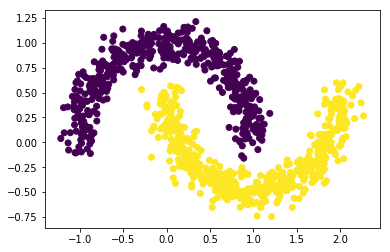

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X_data = np.c_[np.ones((1000, 1)), StandardScaler().fit_transform(X_data)]

In [ ]:
import tensorflow as tf

reset_graph()

X = tf.placeholder(tf.float32, (None, 3), name='X')
y = tf.placeholder(tf.float32, (None, 1), name='y')

theta = tf.Variable(tf.random_uniform([3, 1], -1, 1), name='Weights')
logits = tf.matmul(X, theta)
y_pred = tf.sigmoid(logits)

cross_entr = tf.losses.log_loss(y, y_pred)

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = optimizer.minimize(cross_entr)

batch_size = 64
n_epoches = 1000

In [ ]:
n_batches = np.ceil(len(X_data) / batch_size).astype(np.int)

In [ ]:
X_train = X_data[:int(0.8 * len(X_data))]
X_test = X_data[int(0.8 * len(X_data)):]
y_train = y_data[:int(0.8 * len(y_data))]
y_test = y_data[int(0.8 * len(y_data)):].reshape(-1, 1)

In [ ]:
def GetBatch(epoch, batch_idx, batch_size=batch_size):
  np.random.seed(epoch * n_batches + batch_idx)
  idx = np.random.randint(0, len(X_train), batch_size)
  return X_train[idx], y_train[idx].reshape(-1, 1)

In [ ]:
init = tf.global_variables_initializer()

errs = []
val = []

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(n_epoches):
    for batch in range(n_batches):
      X_batch, y_batch = GetBatch(epoch, batch)
      sess.run(train_step, feed_dict={X: X_batch, y: y_batch})
    if epoch % 50 == 0:
      print(sess.run(cross_entr, feed_dict={X: X_test, y: y_test}))
    if epoch % 25 == 0:
      errs.append(sess.run(cross_entr, feed_dict={X: X_batch, y: y_batch}))    
      val.append(sess.run(cross_entr, feed_dict={X: X_test, y: y_test}))
  y_res = sess.run(y_pred, feed_dict={X: X_test, y: y_test})

0.6336386
0.30390918
0.28404218
0.27837422
0.27612665
0.27492106
0.27406874
0.2740241
0.27392885
0.27395606
0.27381572
0.27404636
0.2741465
0.27431527
0.27404404
0.27427804
0.27430055
0.27403152
0.27410224
0.274266


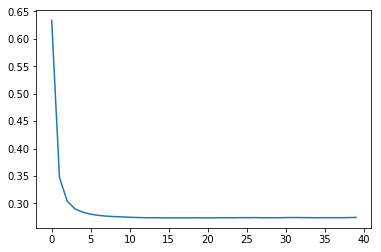

In [ ]:
plt.plot(val)

In [ ]:
y_res = (y_res >= 0.5).astype(np.int)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_res, y_test)

0.885

In [ ]:
from sklearn.metrics import precision_score, recall_score

recall_score(y_res, y_test)

0.8584905660377359

In [ ]:
precision_score(y_res, y_test)

0.9191919191919192